In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [57]:
df = pd.read_csv('titanic.csv')

In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
X = df[['Pclass',"Sex","Age","Fare"]]
y = df['Survived']

<Axes: xlabel='Survived', ylabel='count'>

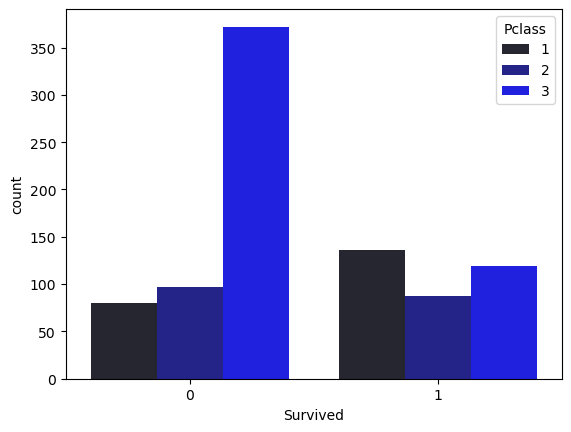

In [61]:
sns.countplot(x='Survived',data=df, hue="Pclass", palette='dark:Blue')

<Axes: xlabel='Survived', ylabel='count'>

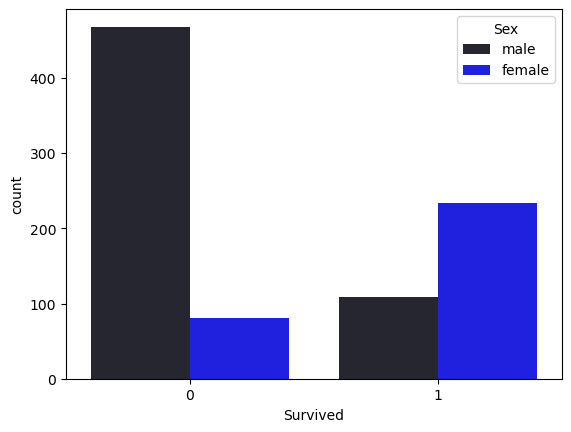

In [62]:
sns.countplot(x='Survived',data=df, hue="Sex", palette='dark:Blue')

<Axes: xlabel='Survived', ylabel='count'>

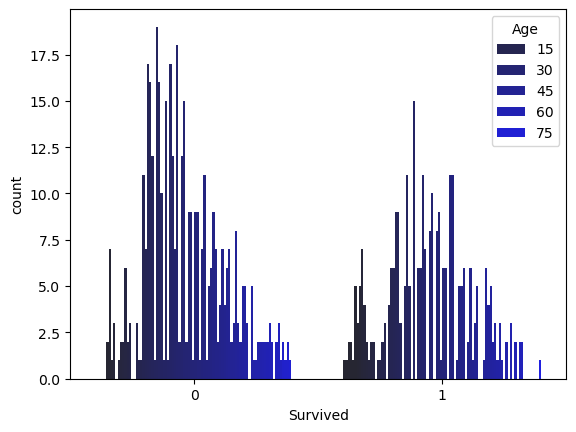

In [63]:
sns.countplot(x='Survived',data=df, hue="Age", palette='dark:Blue')

In [64]:
fare_mean = df.groupby('Survived')['Fare'].mean()
fare_mean

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [65]:
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [66]:
le = LabelEncoder()
X["Sex"] = le.fit_transform(X.Sex)
X.head()

/tmp/ipykernel_31885/3953273900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = le.fit_transform(X.Sex)


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [67]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8491620111731844